In [33]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
, img_to_array
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping


In [34]:
dataset_dir = r"C:\Users\SUJAY KHOND\Downloads\fruits-360_dataset_100x100"

In [35]:
dataset_datagen = ImageDataGenerator(rescale=1.0 / 255)


In [36]:
batch_size = 64 # Reduced batch size


In [37]:
dataset_generator = dataset_datagen.flow_from_directory(
dataset_dir,
target_size=(64, 64),
batch_size=batch_size,
class_mode='categorical'
)


Found 94110 images belonging to 1 classes.


In [38]:
x_train, y_train = dataset_generator[0]
x_test, y_test = dataset_generator[1]

In [42]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64
, 3))

In [40]:
# Step b: Freeze lower layers of the model
for layer in base_model.layers:
    layer.trainable = False

In [47]:
# Step c: Add custom classifier on top
x = Flatten()(base_model.output)
x = Dense(64, activation='relu')(x)
predictions = Dense(len(dataset_generator.class_indices), activation='softmax')(x)
# Create and compile the model
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
# Step d: Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [48]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=5, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


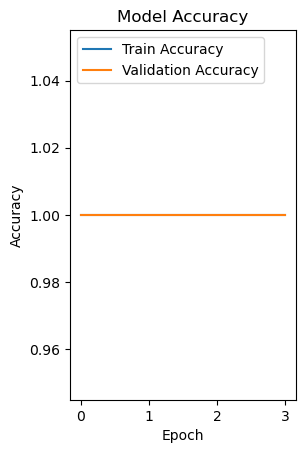

In [49]:
# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

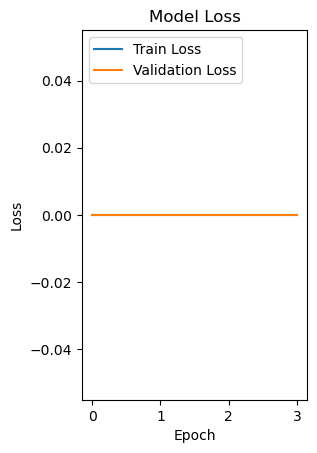

In [54]:
# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [55]:
# Step e: Fine-tune hyperparameters and unfreeze more layers if necessary
for layer in base_model.layers[-4:]:
    layer.trainable = True

In [52]:
# Update the classifier
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = Dense(len(dataset_generator.class_indices), activation='softmax')(x)

In [61]:
# Load and preprocess an external image for prediction
image_path = r"C:\Users\SUJAY KHOND\Downloads\fruits-360_dataset_100x100\fruits-360\Training\Tamarillo 1\6_100.jpg"
img = load_img(image_path, target_size=(64, 64)) 

In [59]:
# Train the fine-tuned model with early stopping
history_fine_tune = model.fit(x_train, y_train, batch_size=batch_size, epochs
=5, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


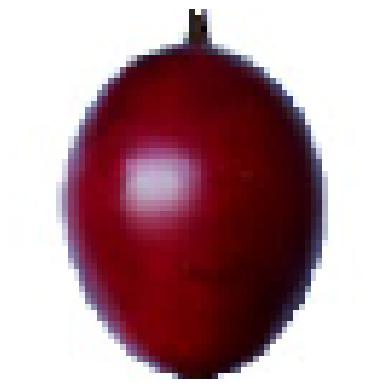

In [62]:
# Visualize the image and the prediction
plt.imshow(img)
#plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()